In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [18]:
#read the CSV file into a pandas dataframe

df = pd.read_csv("~/fork-Nitrogenous-Fate-Project/Nitrogenous-Fate-Project/results/particulate_bmised_areas.csv")
df.head(5)

,filename,compound_name,area,compound_name_IS,area_IS,bmis_area,result_column
0,230810_Blk_G5_NFEX_T24_NH4_Blk_A,"Glycine betaine 0(15N), 0(13C)",6.298512e+07,"Arsenobetaine, 13C2",591801344.0,0.106429,6.870173e+07
1,230810_Blk_G5_NFEX_T24_NH4_Blk_B,"Glycine betaine 0(15N), 0(13C)",9.363098e+07,"Arsenobetaine, 13C2",688531712.0,0.135986,8.778116e+07
2,230810_Blk_G5_NFEX_T24_NO3_Blk_A,"Glycine betaine 0(15N), 0(13C)",8.110735e+07,"Arsenobetaine, 13C2",709285440.0,0.114351,7.381504e+07
3,230810_Blk_G5_NFEX_T24_Urea_Blk_A,"Glycine betaine 0(15N), 0(13C)",2.123621e+08,"Arsenobetaine, 13C2",634969408.0,0.334445,2.158887e+08
4,230810_Poo_G5_NFEX_Full1,"Glycine betaine 0(15N), 0(13C)",2.644738e+09,"Arsenobetaine, 13C2",690919680.0,3.827851,2.470932e+09


In [19]:
# Filtering and data transformation
final_samplepeaks = df[df['filename'].str.startswith("230810_Smp_G5_NFEX_T")].copy()  # Make a copy
final_samplepeaks['day'] = final_samplepeaks['filename'].str.extract(r'T(\d+)')
final_samplepeaks['time'] = pd.to_numeric(final_samplepeaks['day'].str.replace('T', ''))

# Specific hours
specific_hours = [0, 6, 12, 24]

final_samplepeaks.head(5)


,filename,compound_name,area,compound_name_IS,area_IS,bmis_area,result_column,day,time
15,230810_Smp_G5_NFEX_T0_Metab_A,"Glycine betaine 0(15N), 0(13C)",4.993295e+09,"Arsenobetaine, 13C2",649602240.0,7.686697,4.961871e+09,0,0
16,230810_Smp_G5_NFEX_T0_Metab_B,"Glycine betaine 0(15N), 0(13C)",4.907021e+09,"Arsenobetaine, 13C2",657809024.0,7.459643,4.815305e+09,0,0
17,230810_Smp_G5_NFEX_T0_Metab_C,"Glycine betaine 0(15N), 0(13C)",5.126711e+09,"Arsenobetaine, 13C2",665541184.0,7.703071,4.972441e+09,0,0
18,230810_Smp_G5_NFEX_T12_NH4_Metab_A,"Glycine betaine 0(15N), 0(13C)",2.685648e+09,"Arsenobetaine, 13C2",532375776.0,5.044647,3.256390e+09,12,12
19,230810_Smp_G5_NFEX_T12_NH4_Metab_B,"Glycine betaine 0(15N), 0(13C)",3.122053e+09,"Arsenobetaine, 13C2",707928128.0,4.410127,2.846799e+09,12,12


/Users/brianroman/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'FacetGrid' object has no attribute 'set_visible'

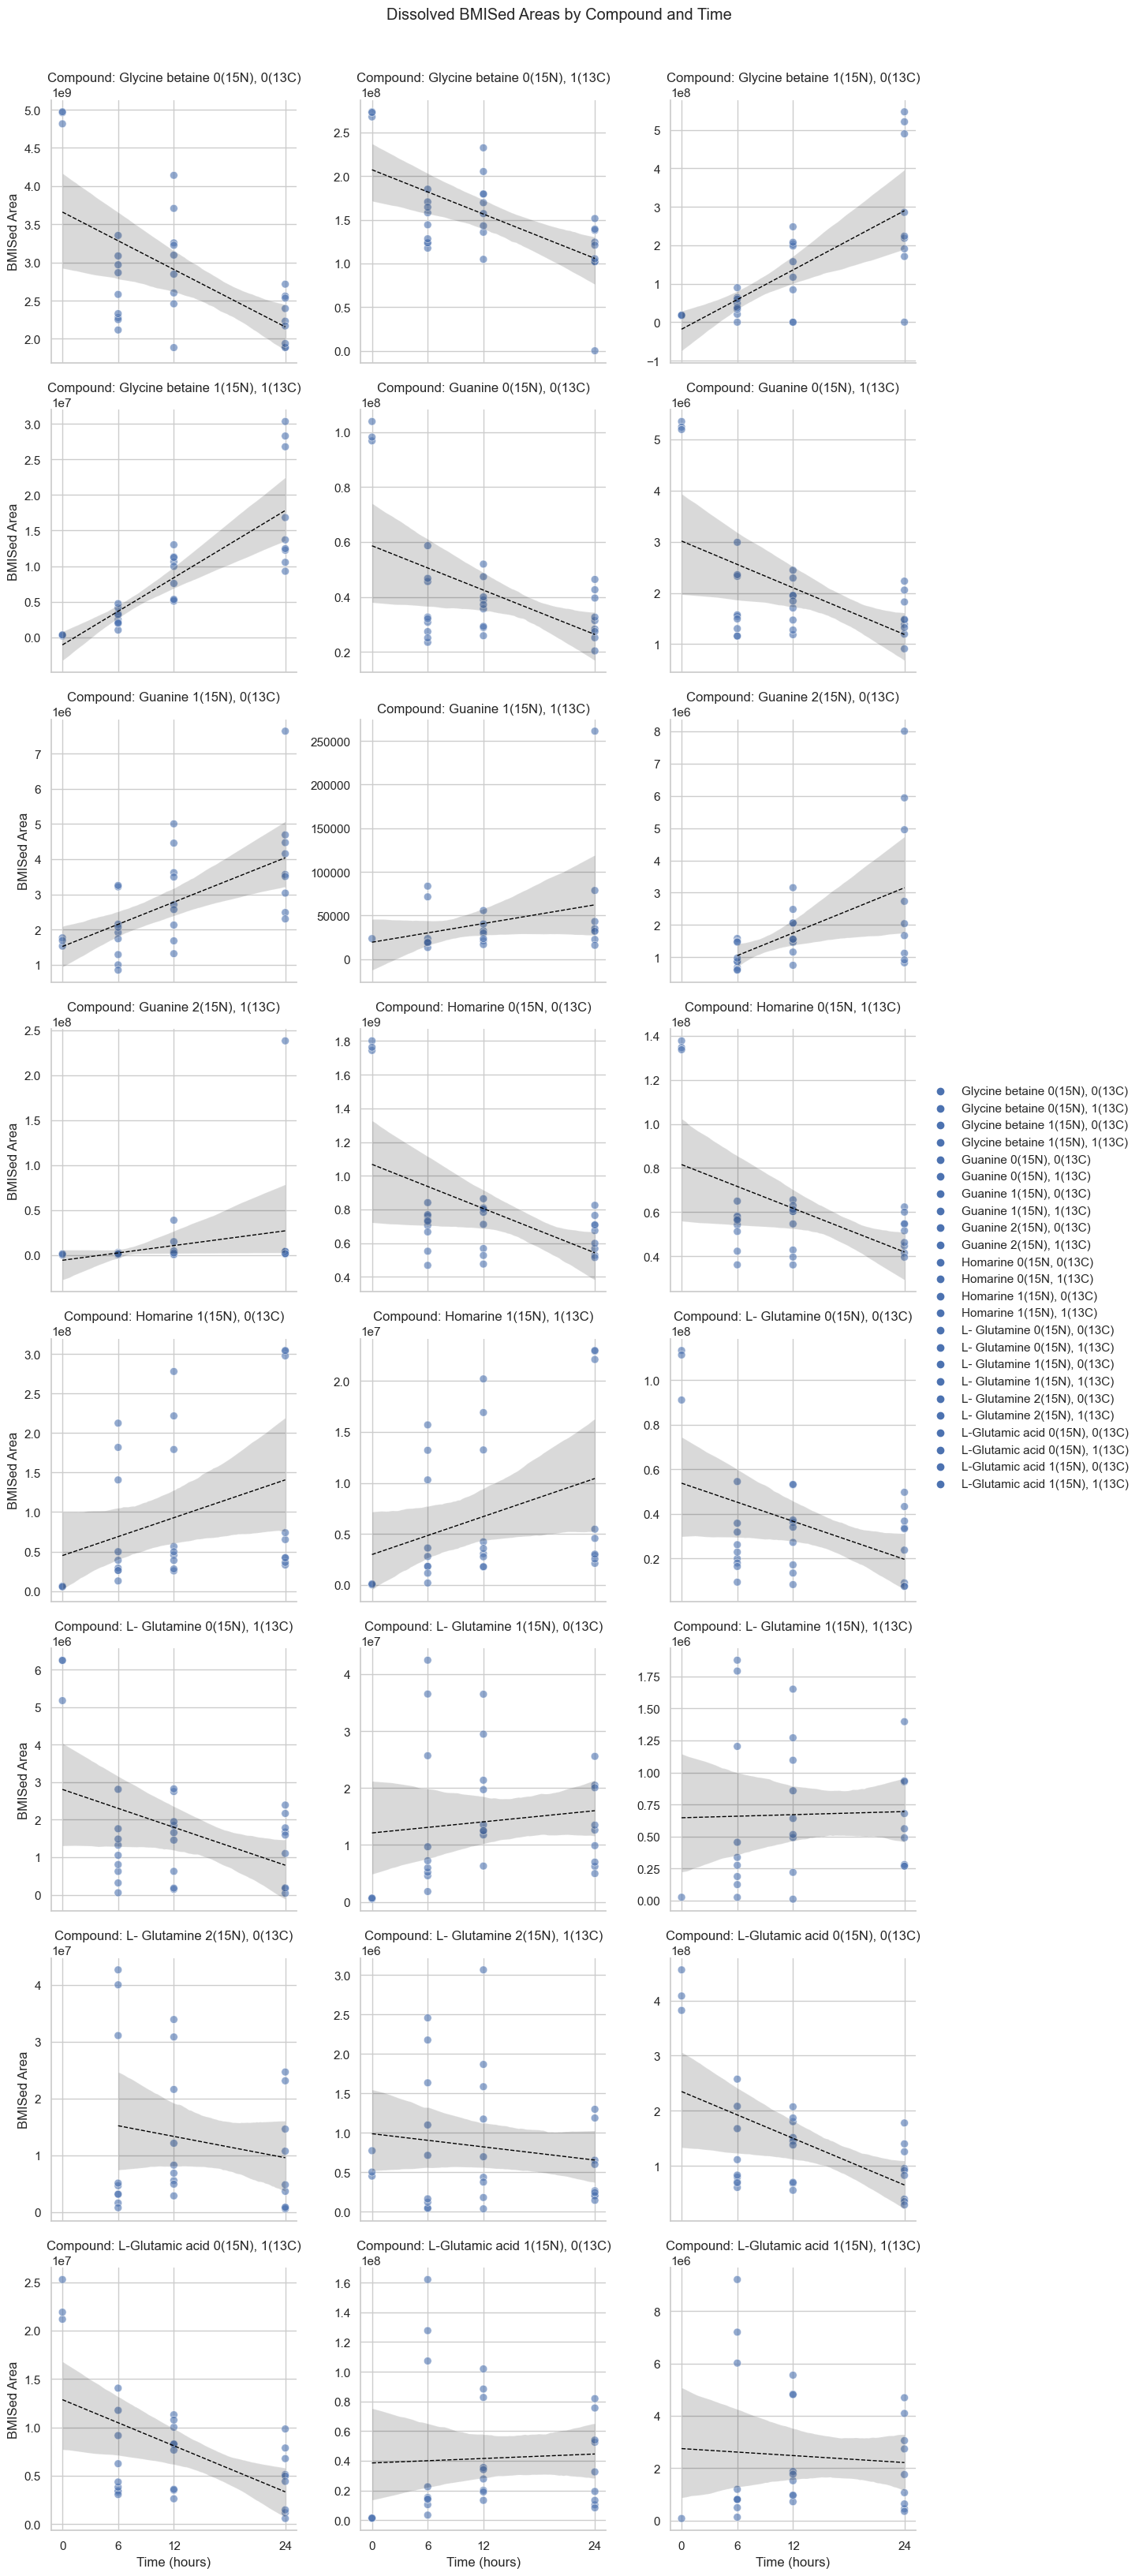

In [21]:
# Plotting using seaborn and matplotlib
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(final_samplepeaks, col="compound_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.scatterplot, x="time", y="result_column", hue="compound_name", s=50, alpha=0.6)
g.map_dataframe(sns.regplot, x="time", y="result_column", scatter=False, color="black", line_kws={"linestyle": "--", "linewidth": 1})
g.set_axis_labels("Time (hours)", "BMISed Area")
g.set_titles("Compound: {col_name}")
g.set(xticks=specific_hours)
g.fig.suptitle("Dissolved BMISed Areas by Compound and Time", y=1.02)
g.add_legend().set_visible(False)

plt.show()

In [23]:
import pandas as pd
import altair as alt

# Assuming df is your DataFrame similar to BMISed_areas in R
df = pd.read_csv("~/fork-Nitrogenous-Fate-Project/Nitrogenous-Fate-Project/results/particulate_bmised_areas.csv")  # Adjust the file path

# Filtering and data transformation
final_samplepeaks = df[df['filename'].str.startswith("230810_Smp_G5_NFEX_T")].copy()  # Make a copy
final_samplepeaks['day'] = final_samplepeaks['filename'].str.extract(r'T(\d+)')
final_samplepeaks['time'] = pd.to_numeric(final_samplepeaks['day'].str.replace('T', ''))

# Specific hours
specific_hours = [0, 6, 12, 24]

# Altair Plotting
alt.Chart(final_samplepeaks).mark_point(size=50, opacity=0.6).encode(
    x=alt.X('time:Q', title='Time (hours)'),
    y=alt.Y('bmised_area:Q', title='BMISed Area'),
    color='compound_name:N'
).facet(
    column=alt.Column('compound_name:N', title='Compound')
).interactive().properties(
    title='Dissolved BMISed Areas by Compound and Time'
)

alt.FacetChart(...)